<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Personality Analysis**

### **Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### **Importing the dataset**

In [253]:
df = pd.read_csv("marketing_campaign.csv", delimiter= '\t').drop_duplicates()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [254]:
df.iloc[:5, :15]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15


In [255]:
df.iloc[:5, 15:]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [256]:
df.shape

(2240, 29)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### **Checking for NULL values**

In [258]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### **Handling NULL values**

In [259]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [260]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [261]:
df['Income'].isnull().sum()

np.int64(0)

### **Feature Engineering**

#### **Renaming the columns**

In [262]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [263]:
df.rename(columns={'ID': 'CustomerId',
    'Dt_Customer': 'EnrolledDate',
    'Recency': 'DaysSinceLastPurchase',

    'MntWines': 'AmountSpentOnWine',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeatProducts',
    'MntFishProducts': 'AmountSpentOnFishProducts',
    'MntSweetProducts': 'AmountSpentOnSweetProducts',
    'MntGoldProds': 'AmountSpentOnGoldProducts',

    'NumDealsPurchases': 'PurchasesMadeWithDiscounts',
    'NumWebPurchases': 'PurchasesMadeViaWeb',
    'NumCatalogPurchases': 'PurchasesMadeViaCatalog',
    'NumStorePurchases': 'PurchasesMadeDirectly',
    'NumWebVisitsMonth': 'NumberOfVisitsToWebsitePerMonth',

    'AcceptedCmp1': 'IsCampaign1Accepted',
    'AcceptedCmp2': 'IsCampaign2Accepted',
    'AcceptedCmp3': 'IsCampaign3Accepted',
    'AcceptedCmp4': 'IsCampaign4Accepted',
    'AcceptedCmp5': 'IsCampaign5Accepted',

    'Complain': 'HasComplainedInLast2Months',
    'Response': 'IsLastCampaignAccepted'}, inplace=True)

#### **Feature Transformation**

In [264]:
df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate'], format='%d-%m-%Y')

In [265]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [266]:
# Replace categories with 'Married' and 'Single' accordingly
df['Marital_Status'] = df['Marital_Status'].replace(
    {
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
    }
    )

#### **Feature Creation**

In [267]:
df['Age'] = pd.Timestamp.today().date().year - df['Year_Birth']

In [268]:
df['TotalAmountSpent'] = df['AmountSpentOnWine'] + df['AmountSpentOnFruits'] + df['AmountSpentOnMeatProducts'] + df['AmountSpentOnFishProducts'] + df['AmountSpentOnSweetProducts'] + df['AmountSpentOnGoldProducts']
df['TotalPurchasesCount'] = df['PurchasesMadeViaWeb'] + df['PurchasesMadeViaCatalog'] + df['PurchasesMadeDirectly']
df['AverageSpendPerPurchase'] = round(df['TotalAmountSpent'] / df['TotalPurchasesCount'], 2)

In [269]:
df['Recency'] = pd.qcut(df['DaysSinceLastPurchase'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)
df['Frequency'] = pd.qcut(df['TotalPurchasesCount'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)
df['Monetary'] = pd.qcut(df['TotalAmountSpent'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

In [270]:
today = pd.Timestamp.today()
df['NumberOfDaysAsCustomer'] = (today - pd.to_datetime(df['EnrolledDate'])).dt.days

#### **Dropping Z_CostContact & Z_Revenue features as these features doesn't add any real value**

In [271]:
df['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2240


In [272]:
df['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2240


In [273]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [274]:
df.iloc[:5, -8:]

,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer
0,68,1617,22,73.50,3,5,5,4636
1,71,27,4,6.75,4,1,1,4086
2,60,776,20,38.80,4,4,4,4285
3,41,53,6,8.83,4,2,1,4112
4,44,422,14,30.14,1,3,3,4134


<Axes: ylabel='Frequency'>

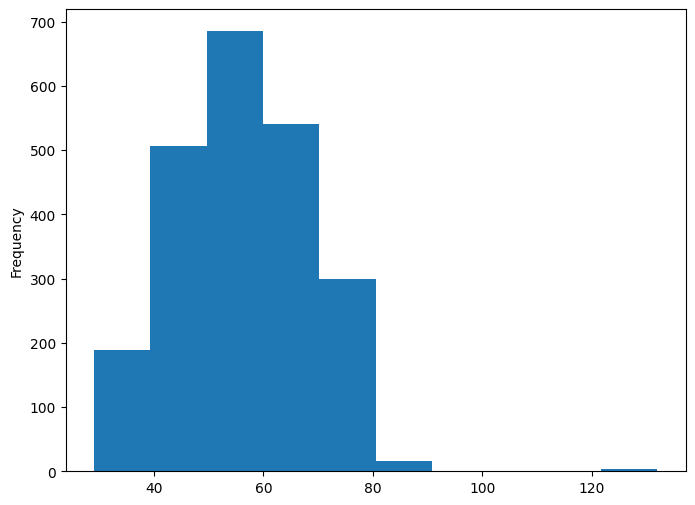

In [275]:
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='hist')

In [276]:
df[df['Age'] > 100]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer
192,7829,1900,2n Cycle,Single,36640.0,1,0,2013-09-26,99,15,...,1,0,125,65,5,13.00,1,1,2,4249
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,132,22,3,7.33,4,1,1,4016
339,1150,1899,PhD,Married,83532.0,0,0,2013-09-26,36,755,...,0,0,126,1853,14,132.36,4,3,5,4249


#### **Removing the outliers from Age column by considering only ages below 100**

In [277]:
df = df[df['Age'] <= 100]

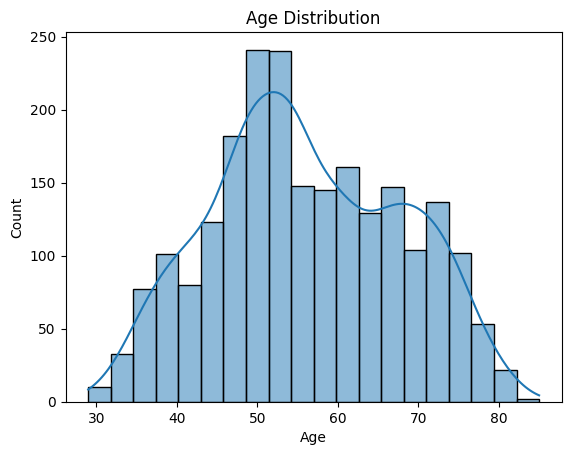

In [278]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

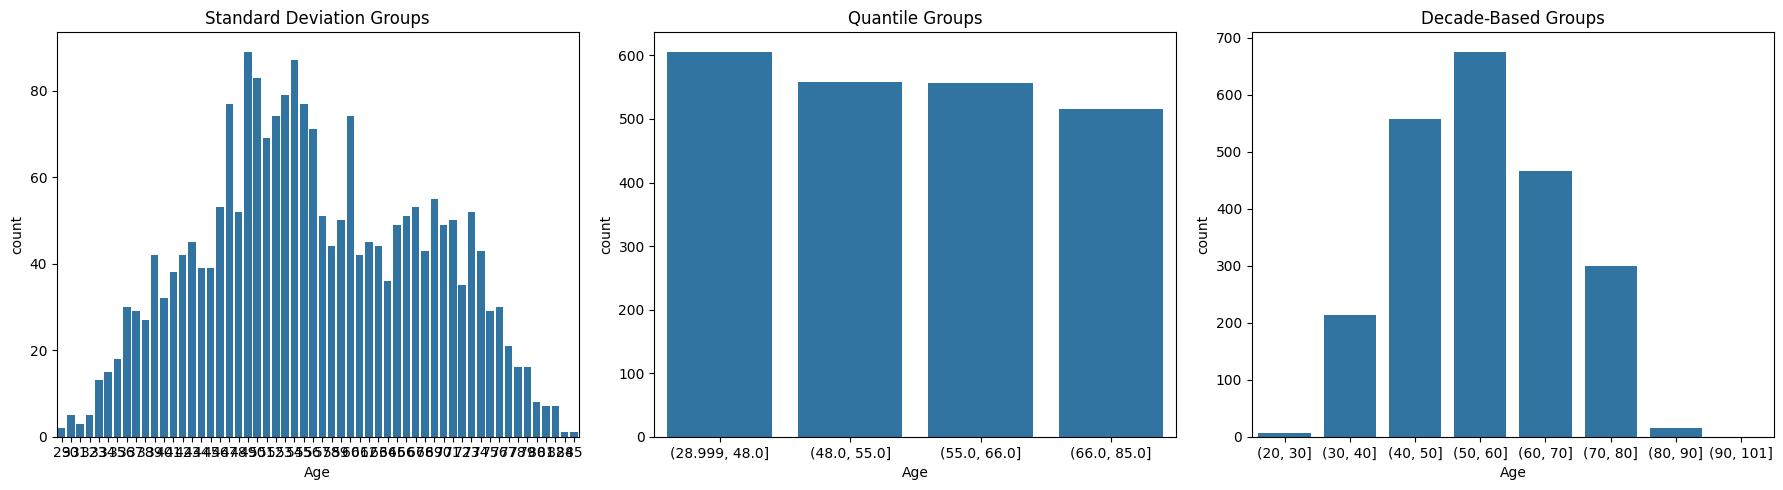

In [279]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Standard Deviation Groups')

sns.countplot(x=pd.qcut(df['Age'], q=4), ax=axes[1])
axes[1].set_title('Quantile Groups')

sns.countplot(x=pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 101]), ax=axes[2])
axes[2].set_title('Decade-Based Groups')

plt.tight_layout()
plt.show()

In [280]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 101]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='TotalAmountSpent', ylabel='TotalPurchasesCount'>

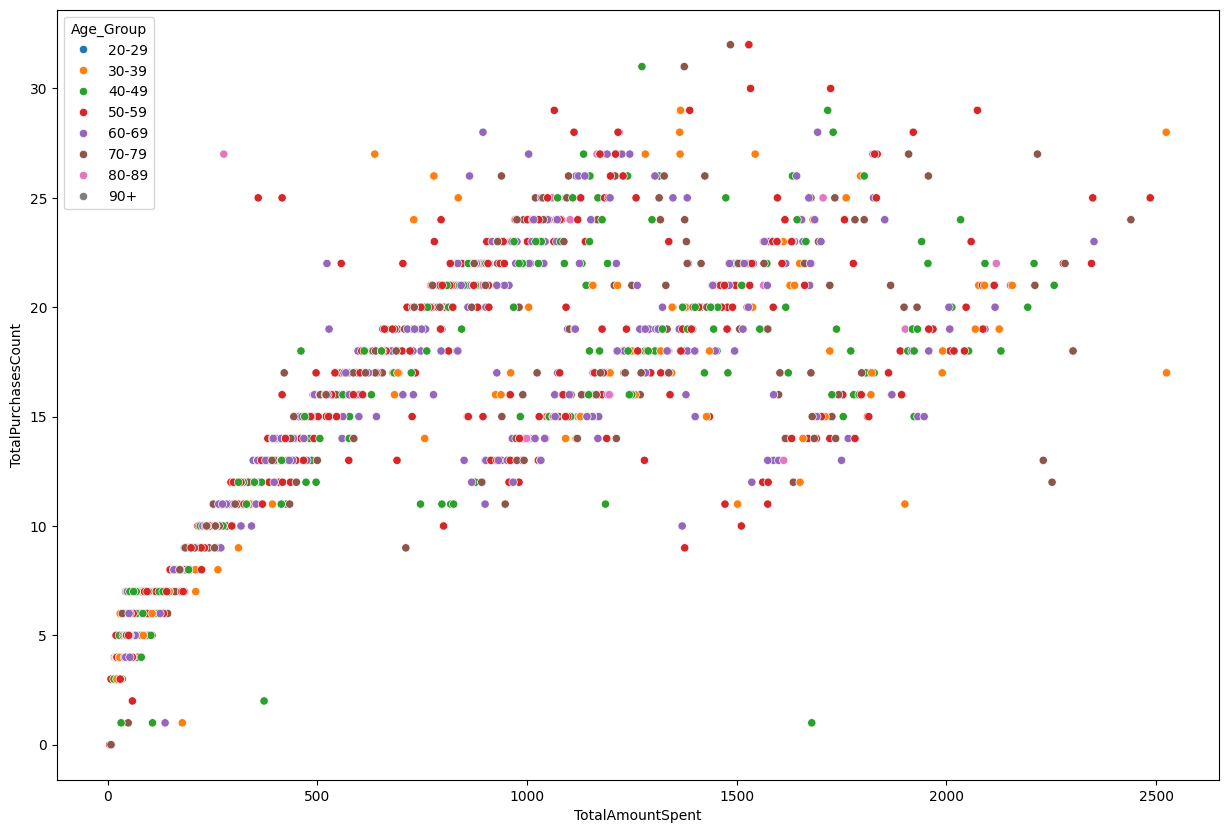

In [281]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='TotalPurchasesCount', data=df, hue='Age_Group')

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

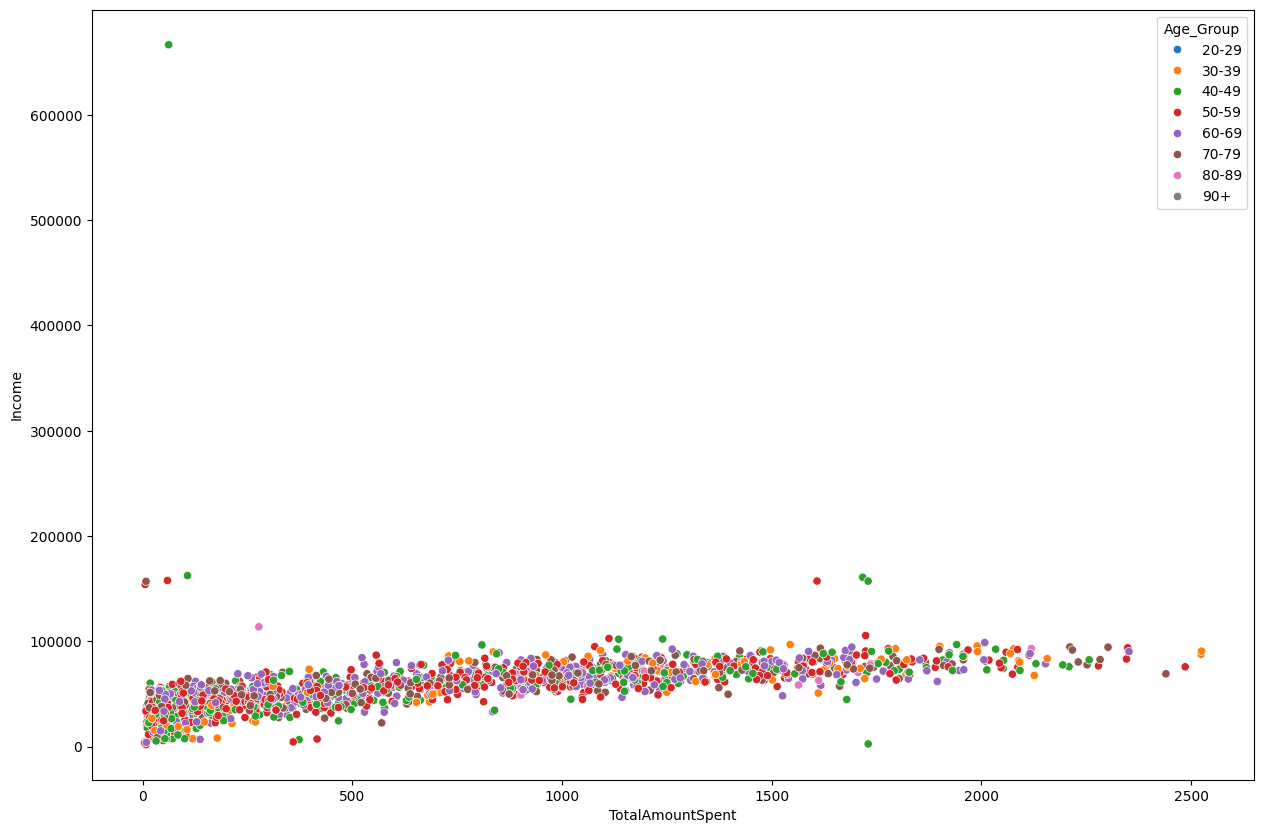

In [282]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

In [283]:
df[df['Income'] > 300000]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer,Age_Group
2233,9432,1977,Graduation,Married,666666.0,1,0,2013-06-02,23,9,...,0,48,62,7,8.86,4,2,2,4365,40-49


#### **Removing the outliers from Income column by considering only Income below 3,00,000 by taking reference of above plot**

In [284]:
df = df[df['Income'] <= 300000]

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

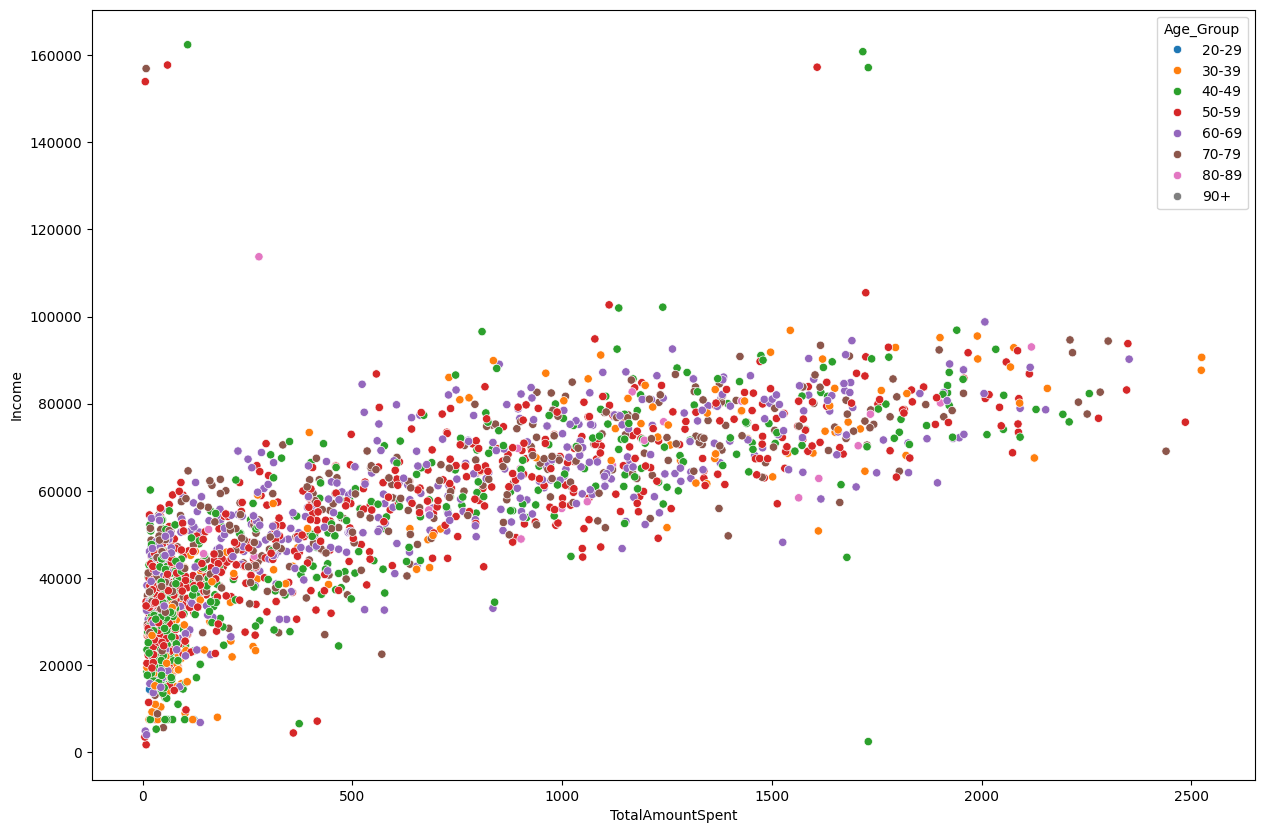

In [285]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

#### **Creating the OfferAccepted column to know if the Customer has accepted the offer in any of the Campaigns**

In [286]:
selected_columns = ['IsCampaign1Accepted', 'IsCampaign2Accepted', 'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted']
df['OfferAccepted'] = df[selected_columns].apply(lambda row: 1 if any(row) else 0, axis=1)

<Axes: ylabel='Frequency'>

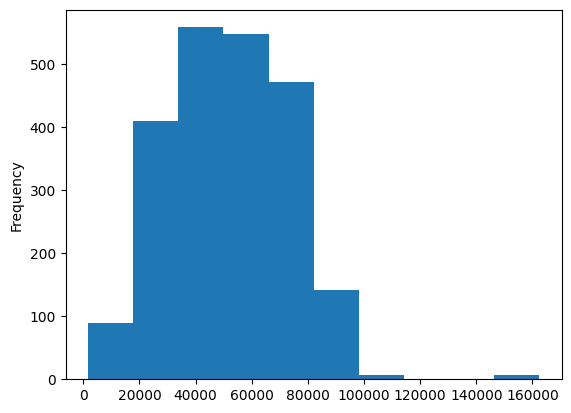

In [287]:
plt.figsize=(20, 8)
df['Income'].plot(kind='hist')

In [288]:
df['IncomeSegment'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])

In [289]:
df.groupby('IncomeSegment')['Income'].agg(['min', 'mean', 'max']).astype(int)

,min,mean,max
IncomeSegment,,,
Low,1730,25278,35441
Lower-Mid,35523,43278,51369
Upper-Mid,51373,59922,68274
High,68281,79374,162397


In [290]:
df.sort_values('EnrolledDate', inplace=True)

In [291]:
df_amount = pd.melt(df
                    , id_vars=['CustomerId']
                    , value_vars=['AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts', 'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts', 'AmountSpentOnGoldProducts']
                    , var_name='ProductCategory'
                    , value_name='AmountSpent')

In [292]:
df_amount['ProductCategory'] = df_amount['ProductCategory'].str.replace('AmountSpentOn', '').str.replace('Products', '')

In [293]:
df_amount['ProductCategory'].unique()

array(['Wine', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'], dtype=object)

In [294]:
df_amount.head(10)

,CustomerId,ProductCategory,AmountSpent
0,6653,Wine,293
1,6181,Wine,488
2,10001,Wine,5
3,4692,Wine,7
4,2611,Wine,1206
5,7118,Wine,833
6,5117,Wine,63
7,8370,Wine,378
8,7990,Wine,9
9,2223,Wine,1215


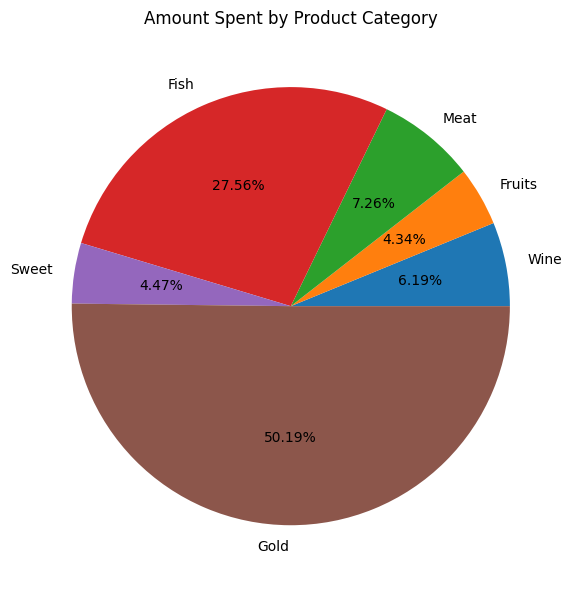

In [295]:
plt.figure(figsize=(6,6))
plt.pie(df_amount.groupby('ProductCategory')['AmountSpent'].sum(), labels=df_amount['ProductCategory'].unique(), autopct='%1.2f%%')
plt.title('Amount Spent by Product Category')
plt.tight_layout()
plt.show()

In [296]:
df_purchase = pd.melt(df
                      , id_vars=['CustomerId']
                      , value_vars=['PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog', 'PurchasesMadeDirectly']
                      , var_name='PurchaseChannel'
                      , value_name='NumberOfPurchasesMade')

In [297]:
df_purchase['PurchaseChannel'] = df_purchase['PurchaseChannel'].str.replace('PurchasesMadeVia', '').str.replace('PurchasesMadeDirectly', 'Direct')

In [298]:
df_purchase.head(10)

,CustomerId,PurchaseChannel,NumberOfPurchasesMade
0,6653,Web,7
1,6181,Web,8
2,10001,Web,2
3,4692,Web,4
4,2611,Web,2
5,7118,Web,9
6,5117,Web,4
7,8370,Web,7
8,7990,Web,0
9,2223,Web,8


Add hue='Age_Group' in below chart

<Axes: xlabel='PurchaseChannel', ylabel='NumberOfPurchasesMade'>

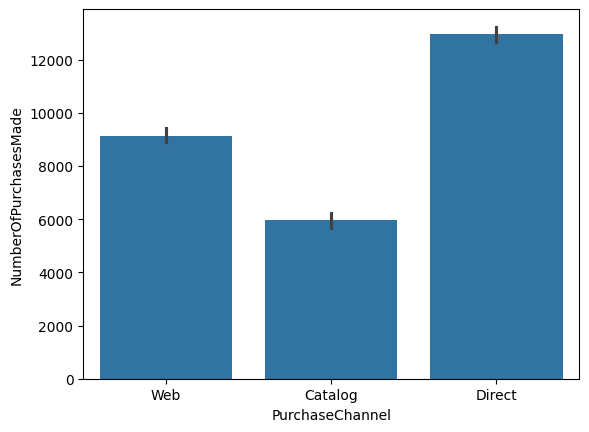

In [299]:
sns.barplot(x='PurchaseChannel', y='NumberOfPurchasesMade', data=df_purchase, estimator='sum')

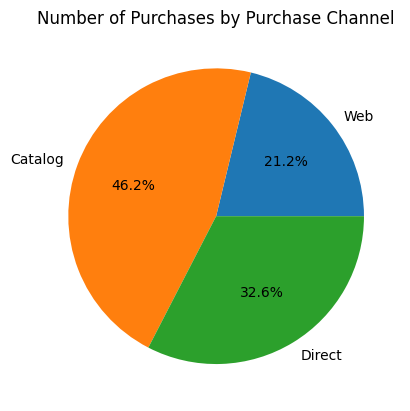

In [300]:
plt.pie(df_purchase.groupby('PurchaseChannel')['NumberOfPurchasesMade'].sum(), labels=df_purchase['PurchaseChannel'].unique(), autopct='%1.1f%%')
plt.title('Number of Purchases by Purchase Channel')
plt.show()

<Axes: xlabel='Age_Group', ylabel='TotalAmountSpent'>

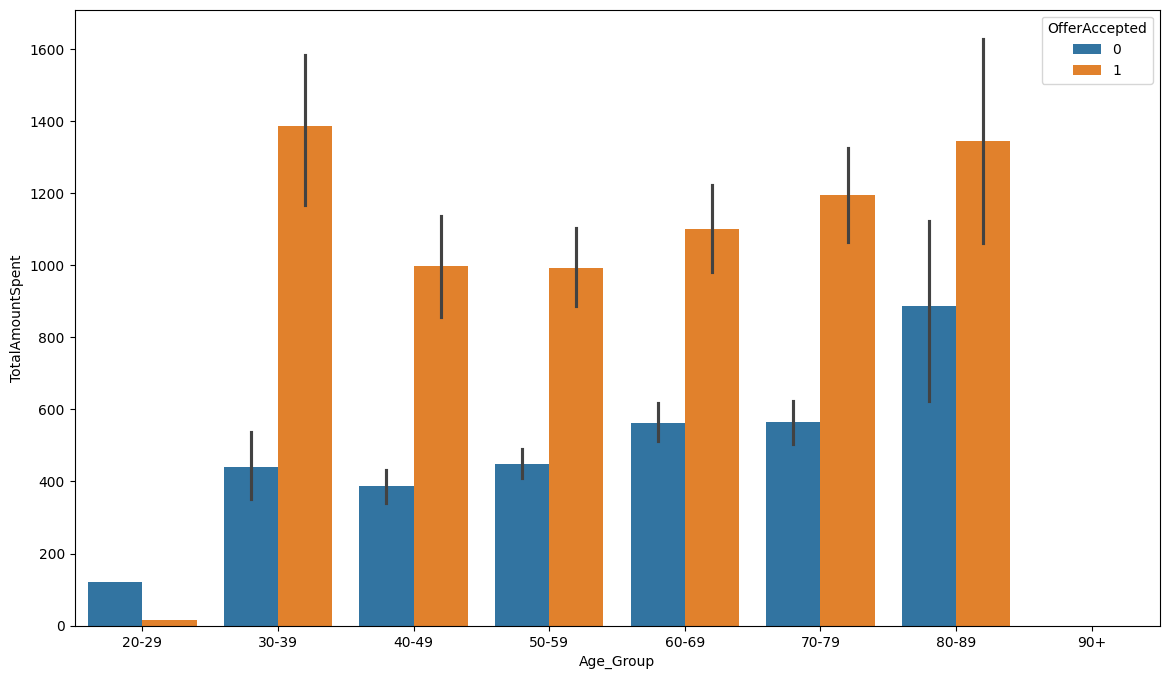

In [301]:
plt.figure(figsize=(14,8))
sns.barplot(x='Age_Group', y='TotalAmountSpent', data=df, hue='OfferAccepted')

<Axes: xlabel='Age_Group', ylabel='Income'>

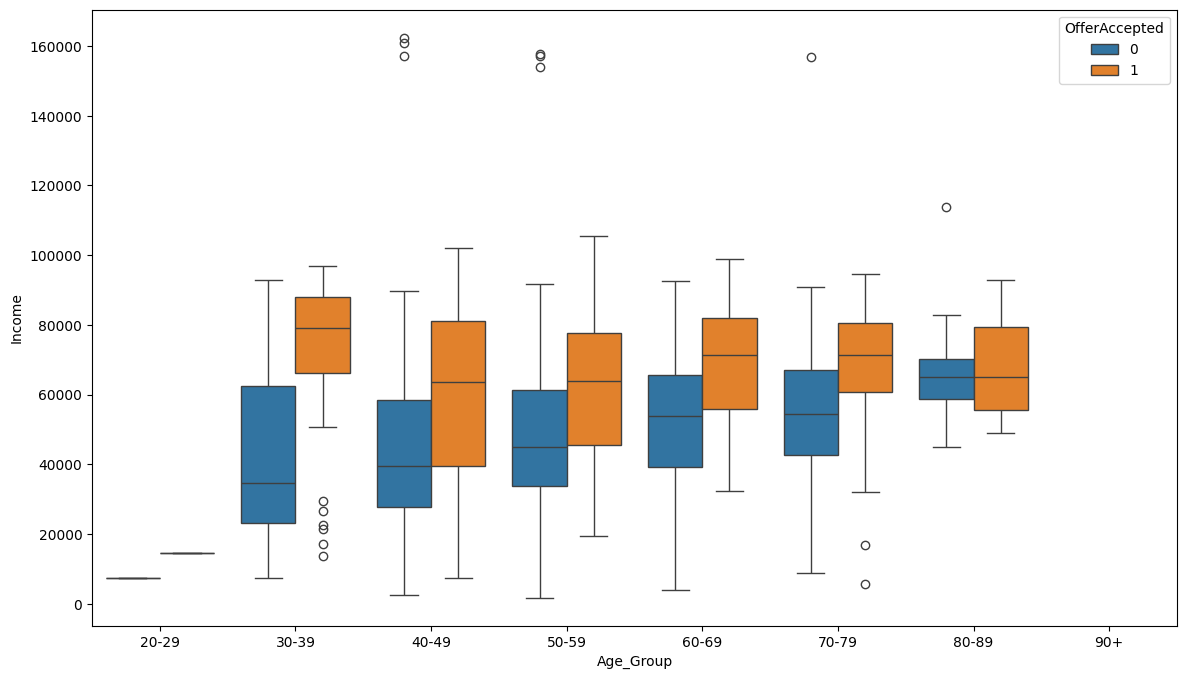

In [302]:
# add proper (Age) order to the below chart
plt.figure(figsize=(14,8))
sns.boxplot(x='Age_Group', y='Income', data=df, hue='OfferAccepted')

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

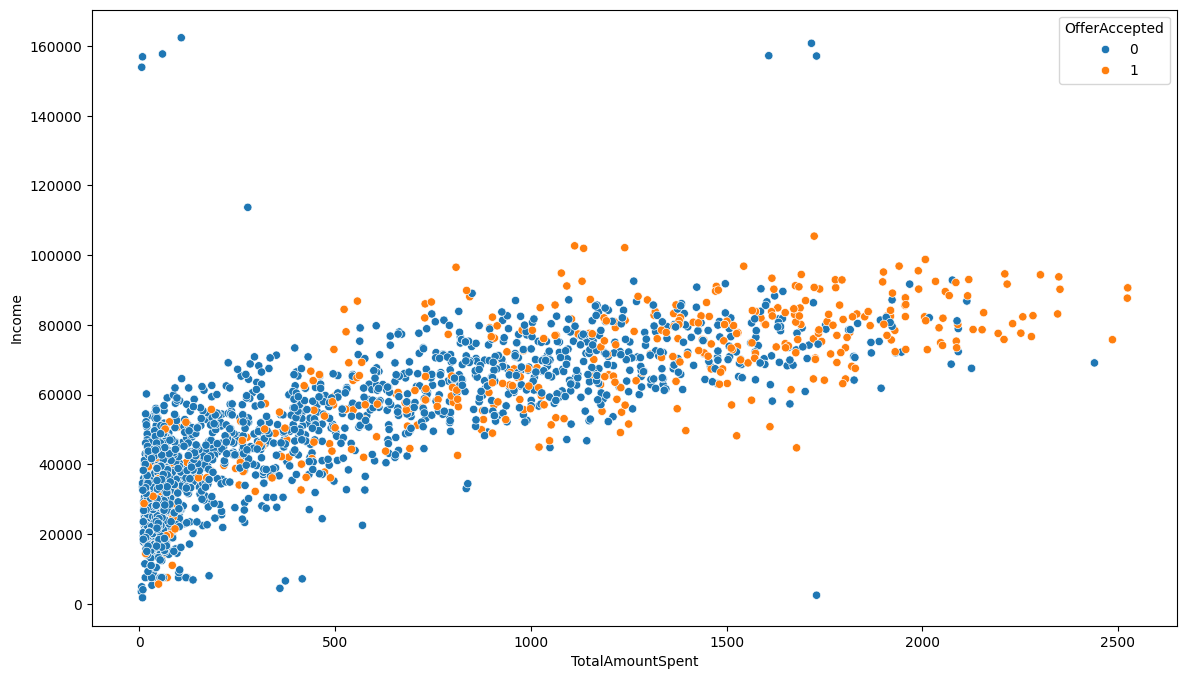

In [303]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='OfferAccepted')

**Combined RFM score**

In [304]:
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary']

**Creating Customer segments such as 'Champions', 'Loyal Customers', 'Potential Loyalists' etc using the Combined RFM score**

In [305]:
conditions = [df['RFM_Score'] >= 12, df['RFM_Score'].between(9, 11), df['RFM_Score'].between(6, 8), df['RFM_Score'].between(4, 5), df['RFM_Score'] <= 3]
segment_names = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost']

In [306]:
df['CustomerSegment'] = np.select(conditions, segment_names, default='Unknown')

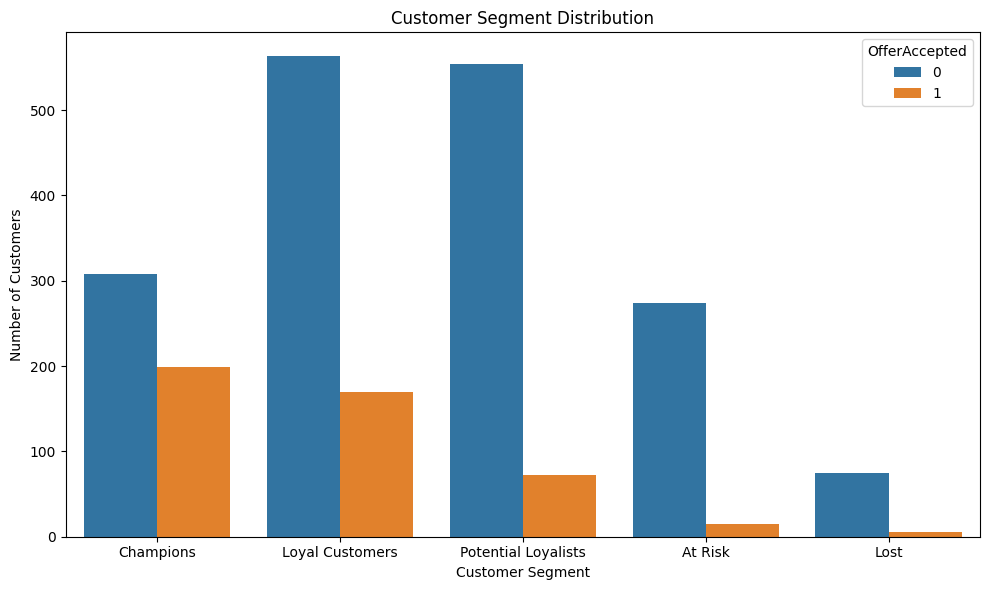

In [307]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CustomerSegment', order=['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost'], hue='OfferAccepted')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [308]:
crosstab = pd.crosstab(df['CustomerSegment'], df['OfferAccepted'], margins=True, normalize=True) * 100
crosstab = crosstab.round(2)
segment_order = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost', 'All']
crosstab = crosstab.reindex(segment_order)

In [309]:
crosstab_str = crosstab.applymap(lambda x: f'{x:.2f} %')
print(crosstab_str)

OfferAccepted              0        1       All
CustomerSegment                                
Champions            13.77 %   8.90 %   22.67 %
Loyal Customers      25.18 %   7.60 %   32.78 %
Potential Loyalists  24.78 %   3.22 %   28.00 %
At Risk              12.25 %   0.67 %   12.92 %
Lost                  3.35 %   0.27 %    3.62 %
All                  79.34 %  20.66 %  100.00 %


In [310]:
pd.crosstab(df['CustomerSegment'], df['OfferAccepted'], margins=True) * 100

OfferAccepted,0,1,All
CustomerSegment,,,
At Risk,27400,1500,28900
Champions,30800,19900,50700
Lost,7500,600,8100
Loyal Customers,56300,17000,73300
Potential Loyalists,55400,7200,62600
All,177400,46200,223600


In [311]:
crosstab_percent = crosstab.div(crosstab.sum(axis=0), axis=1) * 100
crosstab_df = pd.DataFrame(crosstab_percent.reset_index())
crosstab_df_cleaned = crosstab_df.iloc[:-1, 1:]
print(crosstab_df_cleaned)

OfferAccepted          0          1        All
0               8.678389  21.539206  11.335567
1              15.869415  18.393030  16.390820
2              15.617319   7.792836  14.000700
3               7.720426   1.621491   6.460323
4               2.111300   0.653437   1.810091


In [312]:
df.groupby('EnrolledDate')['CustomerId'].nunique().reset_index().head(10)

,EnrolledDate,CustomerId
0,2012-07-30,1
1,2012-07-31,1
2,2012-08-01,4
3,2012-08-02,3
4,2012-08-03,5
5,2012-08-04,4
6,2012-08-05,1
7,2012-08-06,3
8,2012-08-07,4
9,2012-08-08,7


In [313]:
df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate'])
df_month = df.groupby(df['EnrolledDate'].dt.to_period('M'))['CustomerId'].count().reset_index()
df_month.rename(columns={'EnrolledDate': 'Year', 'CustomerId': 'TotalCustomers'}, inplace=True)
df_month

,Year,TotalCustomers
0,2012-07,2
1,2012-08,118
2,2012-09,99
3,2012-10,95
4,2012-11,97
5,2012-12,83
6,2013-01,107
7,2013-02,100
8,2013-03,102
9,2013-04,88


In [314]:
df['MonthStart'] = df['EnrolledDate'].values.astype('datetime64[M]')
df['MonthLabel'] = df['MonthStart'].dt.strftime('%b - %Y')
df_month = df.groupby(['MonthStart', 'MonthLabel'])['CustomerId'].count().reset_index()
df_month.columns = ['MonthStart', 'Month', 'CustomerCount']
df_month = df_month.sort_values('MonthStart')[['Month', 'CustomerCount']]
df_month

,Month,CustomerCount
0,Jul - 2012,2
1,Aug - 2012,118
2,Sep - 2012,99
3,Oct - 2012,95
4,Nov - 2012,97
5,Dec - 2012,83
6,Jan - 2013,107
7,Feb - 2013,100
8,Mar - 2013,102
9,Apr - 2013,88


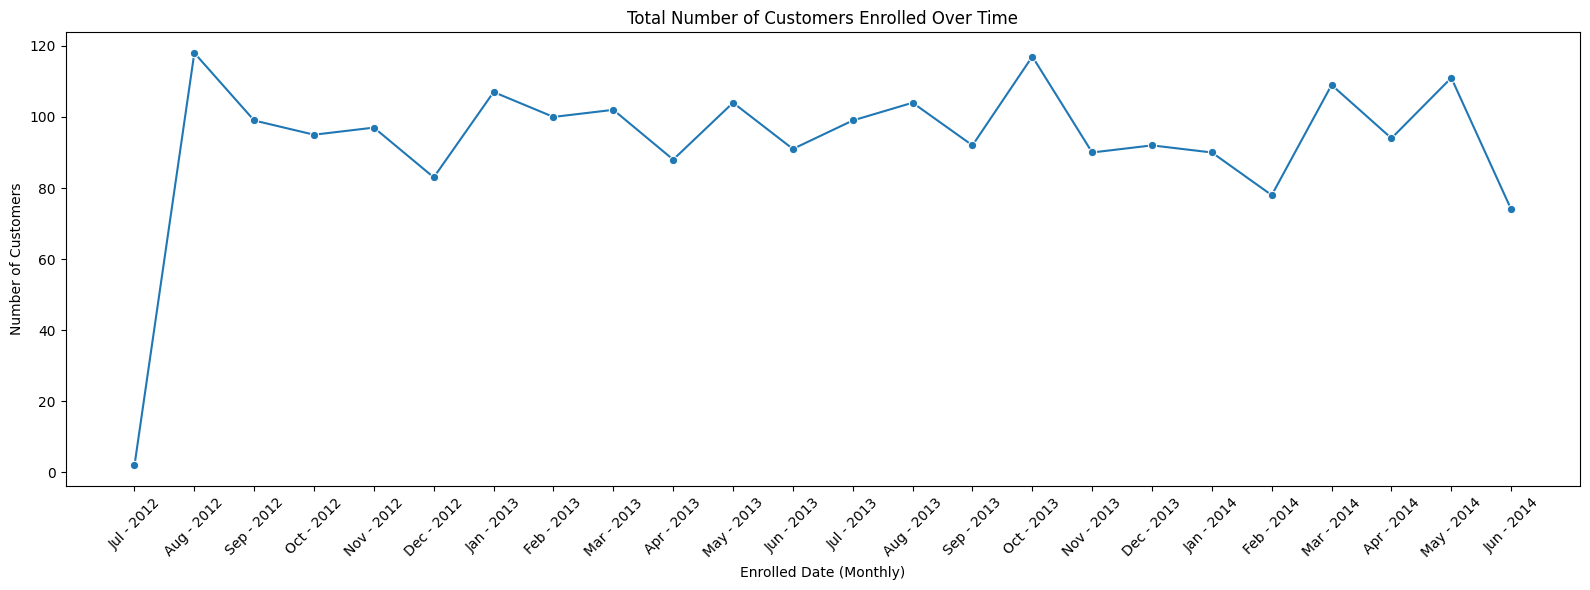

In [315]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Month', y='CustomerCount', data=df_month.astype({'Month': str}), marker='o')
plt.title('Total Number of Customers Enrolled Over Time')
plt.xlabel('Enrolled Date (Monthly)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [316]:
df_month_cum = df.groupby(df['EnrolledDate'].dt.to_period('M'))['CustomerId'].count().cumsum().reset_index()
df_month_cum['EnrolledDate'] = df_month_cum['EnrolledDate'].dt.to_timestamp()
df_month_cum.rename(columns={'CustomerId': 'CumulativeCustomers'}, inplace=True)

In [317]:
df_month_cum

,EnrolledDate,CumulativeCustomers
0,2012-07-01,2
1,2012-08-01,120
2,2012-09-01,219
3,2012-10-01,314
4,2012-11-01,411
5,2012-12-01,494
6,2013-01-01,601
7,2013-02-01,701
8,2013-03-01,803
9,2013-04-01,891


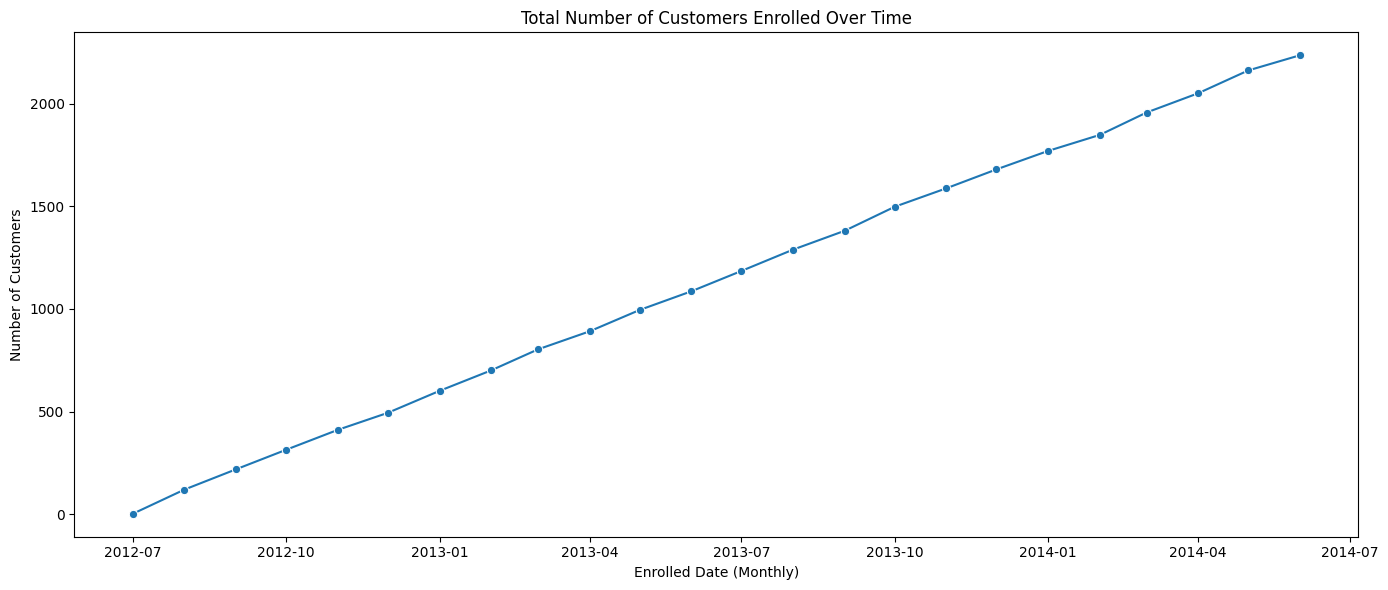

In [318]:
plt.figure(figsize=(14,6))
sns.lineplot(x='EnrolledDate', y='CumulativeCustomers', data=df_month_cum, marker='o') # convert 'Year' column to string type
plt.title('Total Number of Customers Enrolled Over Time')
plt.xlabel('Enrolled Date (Monthly)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

##**Cross-Classifying RFM Scores**

1.	Champions – These are your most engaged and highest-value customers. They have recently purchased, are frequent buyers, and spend a lot of money. Retaining them is crucial.

2.	Loyal (High Value) – These customers are highly engaged and spend well, but may not be as recent as champions. They are critical to retain and may be prime candidates for loyalty programs.

3.	Potential Loyalists (High Value) – These customers have the potential to become loyal, high-value customers. They are frequent buyers but may need some nurturing to increase spend or engagement.

4.	At Risk (High Value) – These are high-value customers who are becoming less engaged or who haven’t purchased recently. Retention efforts should be focused here to prevent churn.

5.	Needs Nurturing (High Value) – These customers have potential but needs nurturing (e.g., more interaction, offers, or personalized campaigns) to increase frequency or spending.

6.	Occasional (High Value) – These customers are not frequent buyers but spend well when they do. They are worth nurturing to become more frequent buyers.

7.	Sleeping (High Value) – These customers have historically been high value but have not been active recently. They may need a reactivation strategy to bring them back.

8.	Loyal (Low Value) – These customers are loyal but don't spend as much. Retention strategies should focus on increasing their spending.

9.	Needs Nurturing (Low Value) – These customers are low spenders but could be nurtured to become more valuable with targeted offers or campaigns.

10.	Occasional (Low Value) – These customers are infrequent buyers and low spenders. They need re-engagement strategies to become more frequent buyers or increase spend.

11.	New Customers (High Value) – These are customers who have recently made a high-value purchase. They are important to nurture to ensure they become long-term loyal customers.

12.	New Customers (Low Value) – These customers are recent but have low spending. It’s crucial to engage them and convert them into higher-value customers.

13.	Lost (Low Value) – These customers have become inactive and are low spenders. They are often difficult to win back, but low-cost campaigns can be targeted to see if they will return.

14.	Sleeping (Low Value) – Customers who were once active but have gone dormant. They are low-value but could be re-engaged with targeted campaigns.

15.	Others – This category includes customers who don't fit into the defined segments or who might be a mix of behavior types. It can often be a catch-all group for outliers or customers with minimal activity.

In [319]:
def rfm_segment(row):
    r = int(row['Recency'])
    f = int(row['Frequency'])
    m = int(row['Monetary'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f <= 2 and m >= 4:
        return 'New Customers'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r >= 4 and 2 < f < 4 and m >= 4:
        return 'Potential Loyalists'
    elif r >= 4 and 2 < f < 4 and m <= 2:
        return 'Potential Loyalists'
    elif 2 <= r <= 3 and f >= 4 and m >= 4:
        return 'Loyal'
    elif 2 <= r <= 3 and f >= 4 and m <= 2:
        return 'Loyal'
    elif 2 <= r <= 3 and 2 <= f <= 3 and m >= 4:
        return 'Needs Nurturing'
    elif 2 <= r <= 3 and 2 <= f <= 3 and m <= 2:
        return 'Needs Nurturing'
    elif 2 <= r <= 3 and f <= 1 and m >= 4:
        return 'Occasional'
    elif 2 <= r <= 3 and f <= 1 and m <= 2:
        return 'Occasional'
    elif r == 1 and f >= 4 and m >= 4:
        return 'At Risk'
    elif r == 1 and f >= 4 and m <= 2:
        return 'At Risk'
    elif r == 1 and 2 <= f <= 3 and m >= 4:
        return 'Sleeping'
    elif r == 1 and 2 <= f <= 3 and m <= 2:
        return 'Sleeping'
    elif r == 1 and f == 1 and m >= 4:
        return 'Lost'
    elif r == 1 and f == 1 and m <= 2:
        return 'Lost'
    else:
        return 'Others'

In [320]:
df['RFM_Segment'] = df.apply(rfm_segment, axis=1)

In [321]:
segment_order = ['Champions',
    'Loyal',
    'Potential Loyalists',
    'At Risk',
    'Needs Nurturing',
    'Occasional',
    'Sleeping',
    'Loyal',
    'Needs Nurturing',
    'Occasional',
    'New Customers',
    'New Customers',
    'Lost',
    'Sleeping',
    'Others']

print(df['RFM_Segment'].value_counts().reindex(segment_order))

RFM_Segment
Champions              292
Loyal                  303
Potential Loyalists     53
At Risk                157
Needs Nurturing        213
Occasional             198
Sleeping               103
Loyal                  303
Needs Nurturing        213
Occasional             198
New Customers          367
New Customers          367
Lost                   102
Sleeping               103
Others                 448
Name: count, dtype: int64


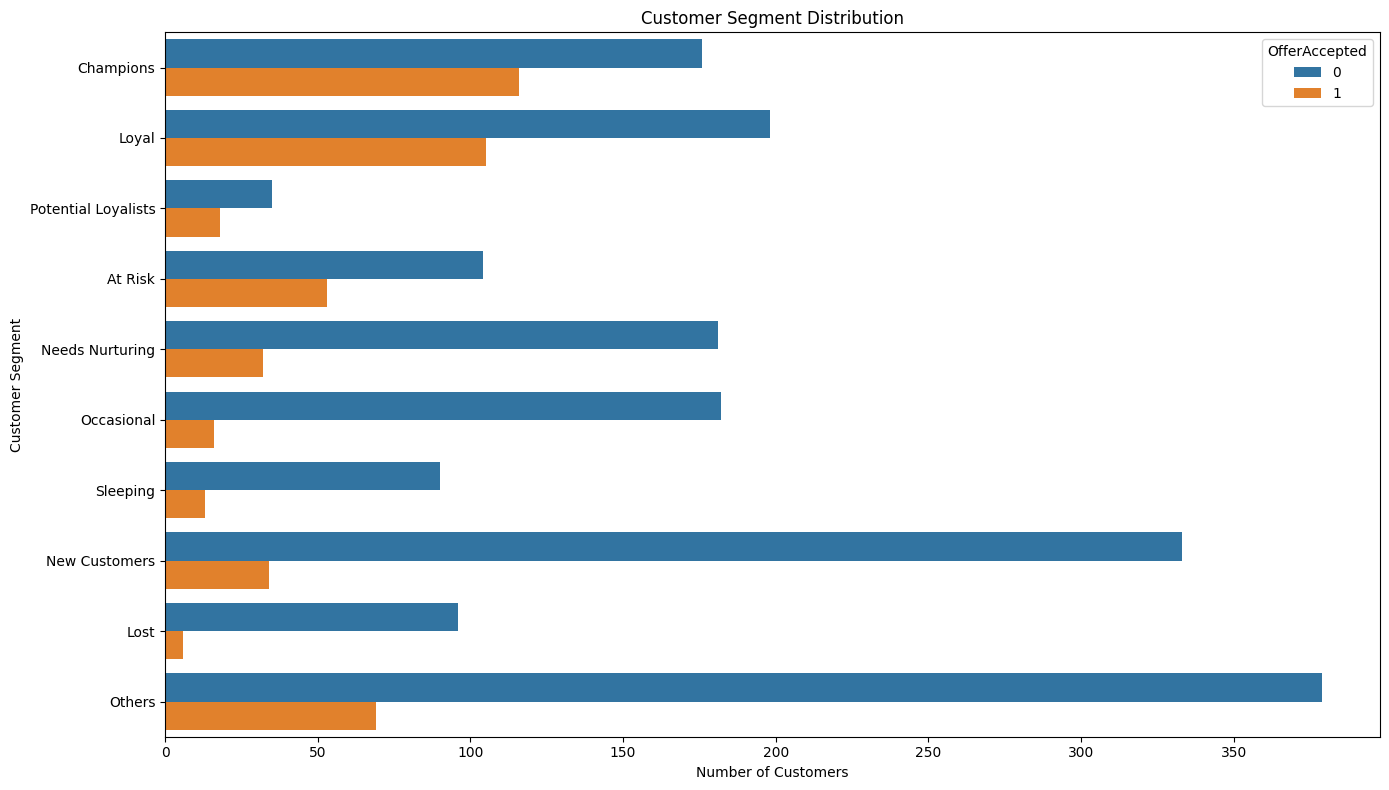

In [322]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, y='RFM_Segment', order=segment_order, hue='OfferAccepted')
plt.title('Customer Segment Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

**High Value Segment: High-value customers are those who purchase frequently, have recent activity, and spend a lot, making them critical for revenue and retention.**

In [323]:
High_Value_Customers = df[df['RFM_Segment'].isin(['Champions', 'Loyal', 'Potential Loyalists', 'At Risk'])]

**Behavioral Profile**

In [324]:
High_Value_Customers.groupby('RFM_Segment')[['AmountSpentOnWine'
                                           , 'AmountSpentOnFruits'
                                           , 'AmountSpentOnMeatProducts'
                                           , 'AmountSpentOnFishProducts'
                                           , 'AmountSpentOnSweetProducts'
                                           , 'AmountSpentOnGoldProducts']].mean().reset_index()

,RFM_Segment,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts
0,At Risk,629.305732,52.471338,372.318471,74.796178,55.273885,74.726115
1,Champions,612.571918,56.551370,356.178082,78.972603,54.349315,76.301370
2,Loyal,641.953795,52.468647,363.627063,78.811881,58.537954,76.481848
3,Potential Loyalists,646.660377,57.056604,368.886792,75.735849,56.132075,72.377358


In [325]:
High_Value_Customers.groupby('RFM_Segment')[[ 'PurchasesMadeViaWeb'
                                           , 'PurchasesMadeViaCatalog'
                                           , 'PurchasesMadeDirectly']].sum().reset_index()

,RFM_Segment,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly
0,At Risk,989,897,1396
1,Champions,1833,1618,2677
2,Loyal,1826,1696,2782
3,Potential Loyalists,223,202,313


In [326]:
High_Value_Customers.groupby('RFM_Segment')[['HasComplainedInLast2Months']].sum().reset_index()

,RFM_Segment,HasComplainedInLast2Months
0,At Risk,1
1,Champions,1
2,Loyal,3
3,Potential Loyalists,0


In [327]:
High_Value_Customers.groupby('RFM_Segment')[['NumberOfDaysAsCustomer']].mean().reset_index().round(2)

,RFM_Segment,NumberOfDaysAsCustomer
0,At Risk,4379.73
1,Champions,4357.08
2,Loyal,4357.72
3,Potential Loyalists,4341.94


**Demographic Breakdown**

<Axes: xlabel='RFM_Segment', ylabel='Age'>

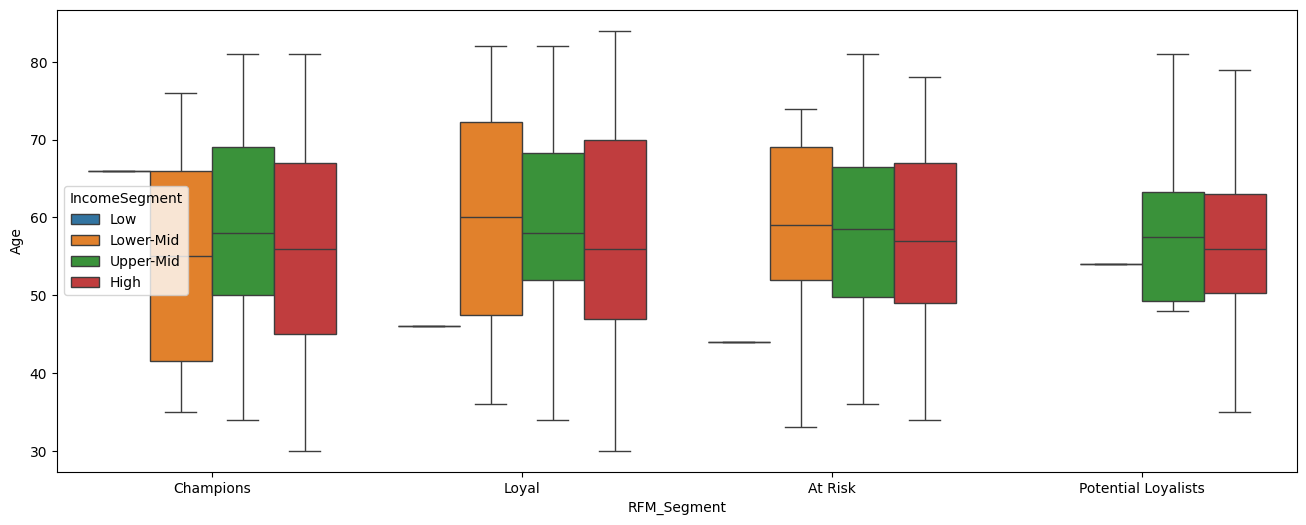

In [328]:
plt.figure(figsize=(16,6))
sns.boxplot(data=High_Value_Customers, x='RFM_Segment', y='Age', hue='IncomeSegment')

<Axes: xlabel='RFM_Segment'>

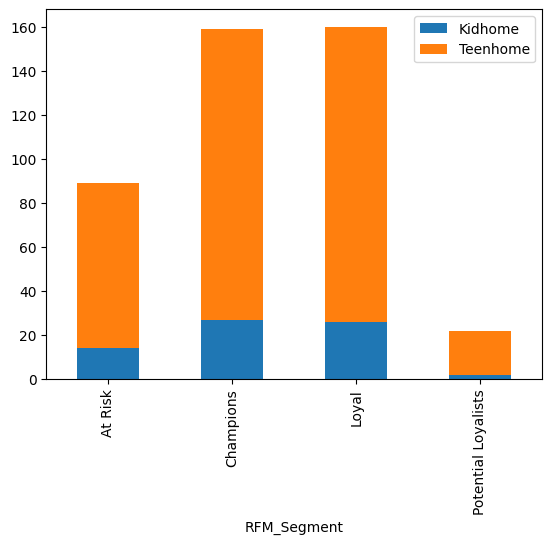

In [329]:
High_Value_Customers.groupby('RFM_Segment')[['Kidhome', 'Teenhome']].sum().plot(kind='bar', stacked=True)

<Axes: xlabel='Marital_Status', ylabel='count'>

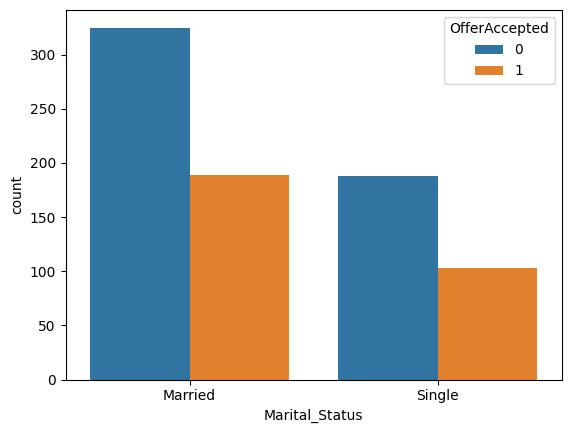

In [330]:
sns.countplot(x='Marital_Status', data=High_Value_Customers, hue='OfferAccepted')

Create a crosstab for Marital_Status, KidAtHome and OfferAccepted



**Campaign Engagement**

In [331]:
High_Value_Customers.groupby('RFM_Segment')[['IsCampaign1Accepted'
                                           , 'IsCampaign2Accepted'
                                           , 'IsCampaign3Accepted'
                                           , 'IsCampaign4Accepted'
                                           , 'IsCampaign5Accepted'
                                           , 'IsLastCampaignAccepted']].sum().reset_index()

,RFM_Segment,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted
0,At Risk,17,4,14,19,27,19
1,Champions,50,8,31,38,54,90
2,Loyal,45,8,22,44,51,58
3,Potential Loyalists,9,2,2,7,11,22


**Low-Value Segments: Segments consisting of customers who buy less often, spend less, or haven't purchased recently, making them less impactful to current profits but important for growth opportunities.**

In [332]:
Low_Value_Customers = df[df['RFM_Segment'].isin(['Needs Nurturing', 'Occasional', 'Sleeping', 'New Customers', 'Lost'])]

**Dimensionality Reduction + Clustering**

In [333]:
df.to_csv('df_Clustering.csv', index=False)